In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)

In [9]:
number_of_entries_per_day = dict()
for day in data.Date:
    if day in number_of_entries_per_day:
        number_of_entries_per_day[day] +=1
    else:
        number_of_entries_per_day[day] = 1

frequences = number_of_entries_per_day.values()
min(frequences), max(frequences)

(396, 1440)

In [10]:
days_in_a_year = {2006: (0), 2007:(0), 2008: (0), 2009:(0), 2010:(0)}

for day in number_of_entries_per_day:
    year = int(day[-4:])
    days_in_a_year[year] += 1

days_in_a_year

{2006: 16, 2007: 365, 2008: 366, 2009: 365, 2010: 330}

In [6]:
print(data.columns)


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [7]:
print(data[["Date", "Time"]].head())


         Date      Time
0  16/12/2006  17:24:00
1  16/12/2006  17:25:00
2  16/12/2006  17:26:00
3  16/12/2006  17:27:00
4  16/12/2006  17:28:00


In [11]:
# Specify the date format and set infer_datetime_format=True
data["Date"] = pd.to_datetime(data["Date"], format='%d/%m/%Y', infer_datetime_format=True)
data["Time"] = pd.to_timedelta(data["Time"])
data["Timestamp"] = data["Date"] + data["Time"]


In [12]:
# Missing values as NaN
data = data.replace('?', np.NaN)

In [13]:
# Conversion to numerical values
cols = list(data.columns)
cols.remove('Date')
cols.remove('Time')
cols.remove('Timestamp')
cols.remove('Sub_metering_3')

In [14]:
for col in cols:
    data[col] = pd.to_numeric(data[col])

# Check missing values
missing_values = data.isnull().sum()

# Display missing values count
print(missing_values)

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Timestamp                    0
dtype: int64


In [15]:
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    data[col].fillna(data[col].mean(), inplace=True)


In [16]:
for col in cols:
    data[col] = pd.to_numeric(data[col])
data.dtypes

Date                      datetime64[ns]
Time                     timedelta64[ns]
Global_active_power              float64
Global_reactive_power            float64
Voltage                          float64
Global_intensity                 float64
Sub_metering_1                   float64
Sub_metering_2                   float64
Sub_metering_3                   float64
Timestamp                 datetime64[ns]
dtype: object

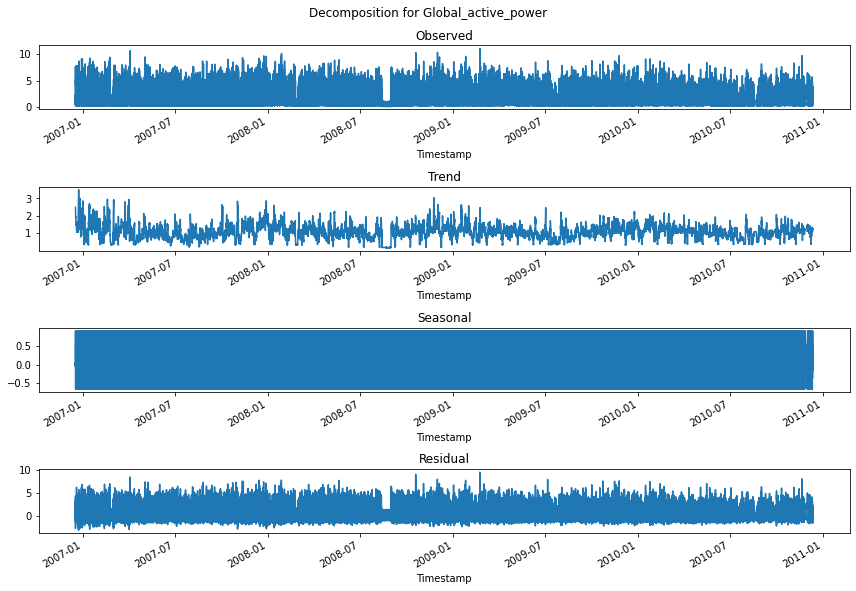

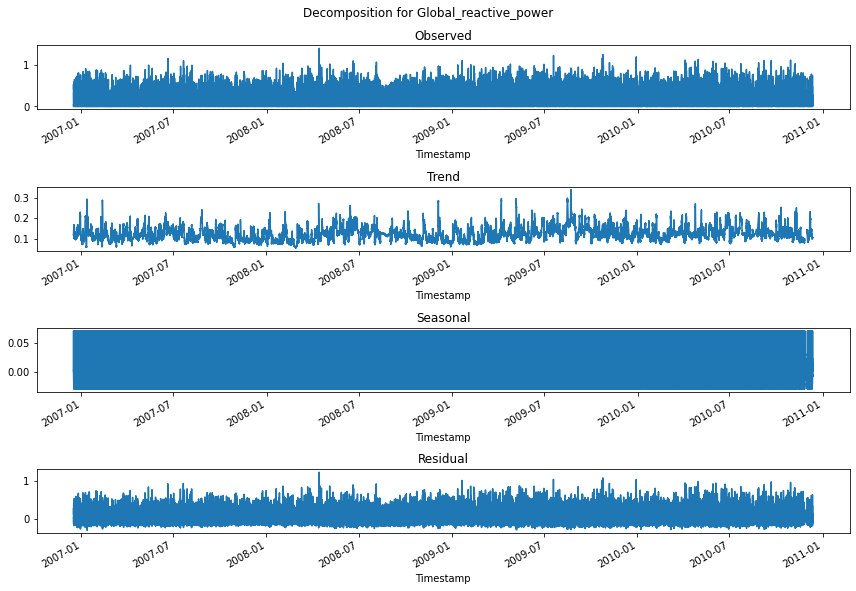

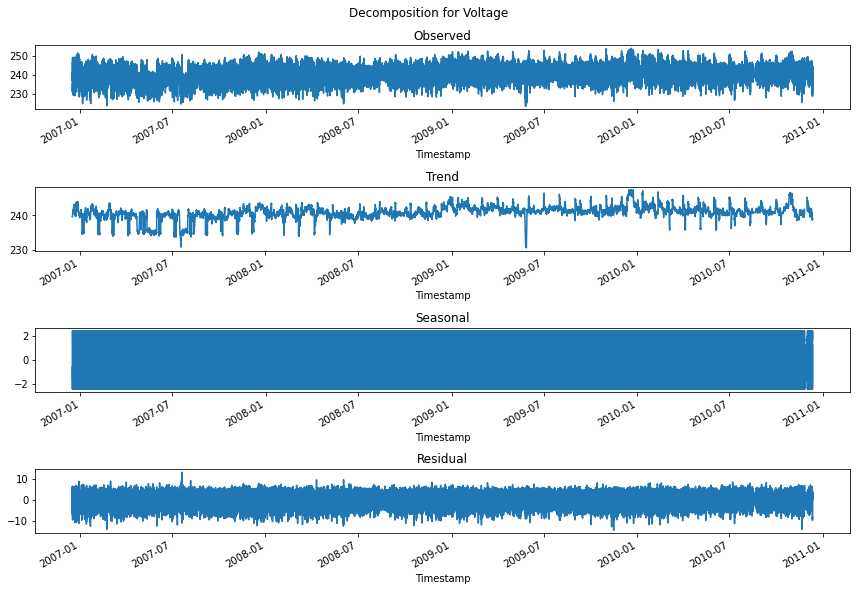

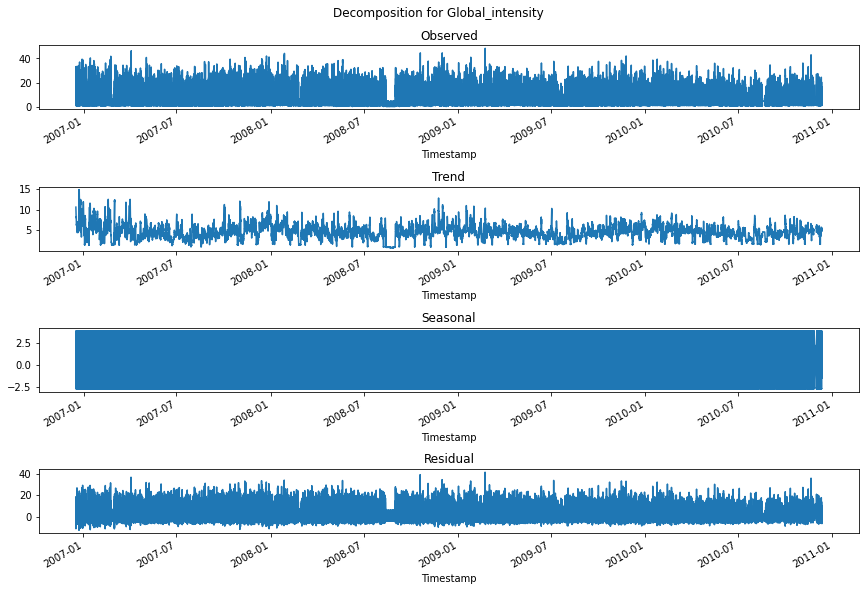

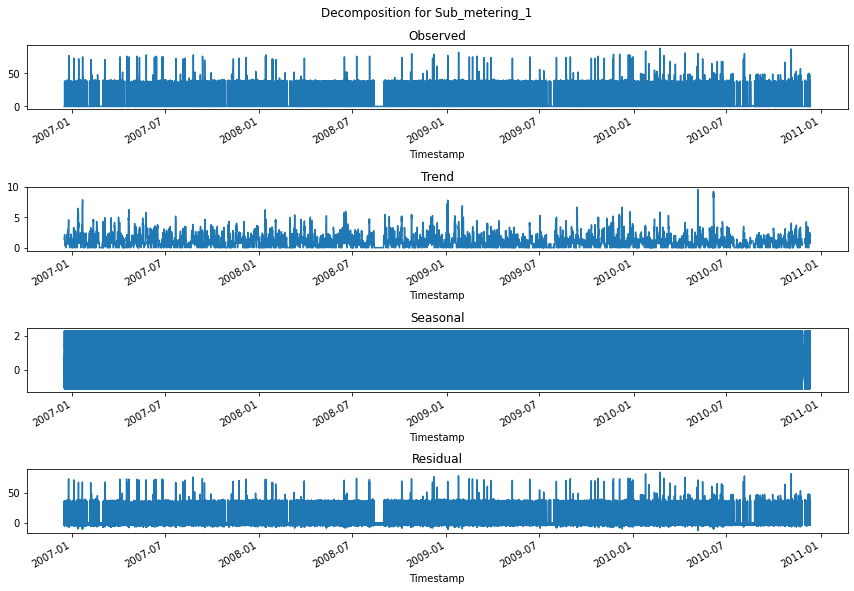

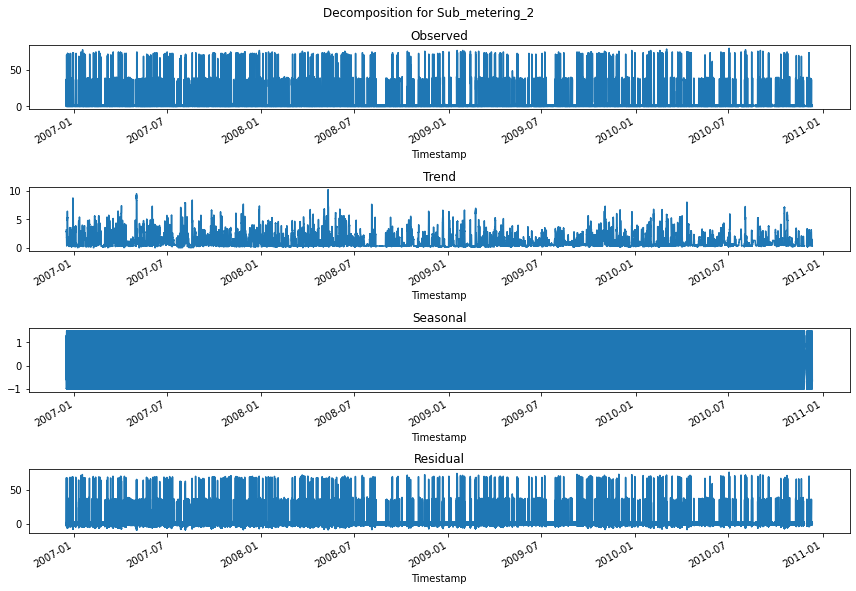

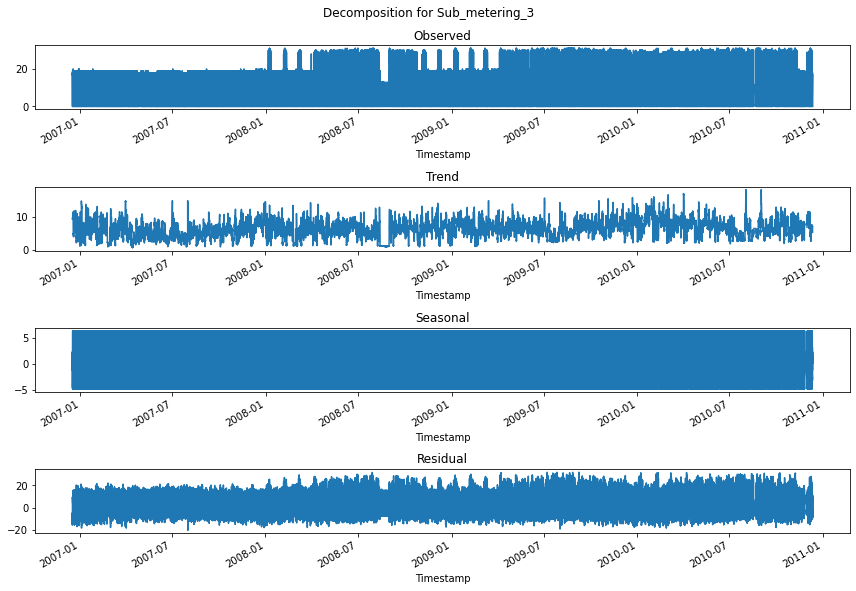

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'data'
# Set the 'Timestamp' column as the index
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

# Select all numeric columns for decomposition (excluding non-numeric columns)
numeric_columns = data.select_dtypes(include=[float]).columns

# Perform seasonal decomposition on each numeric column
for column in numeric_columns:
    decompose_result = seasonal_decompose(data[column], period=1440, model='additive')
    
    # Plot the decomposed components for each column
    fig, axes = plt.subplots(4, 1, figsize=(12, 8))
    decompose_result.observed.plot(ax=axes[0], title='Observed')
    decompose_result.trend.plot(ax=axes[1], title='Trend')
    decompose_result.seasonal.plot(ax=axes[2], title='Seasonal')
    decompose_result.resid.plot(ax=axes[3], title='Residual')
    
    plt.tight_layout()
    plt.suptitle(f'Decomposition for {column}', y=1.02)
    plt.show()


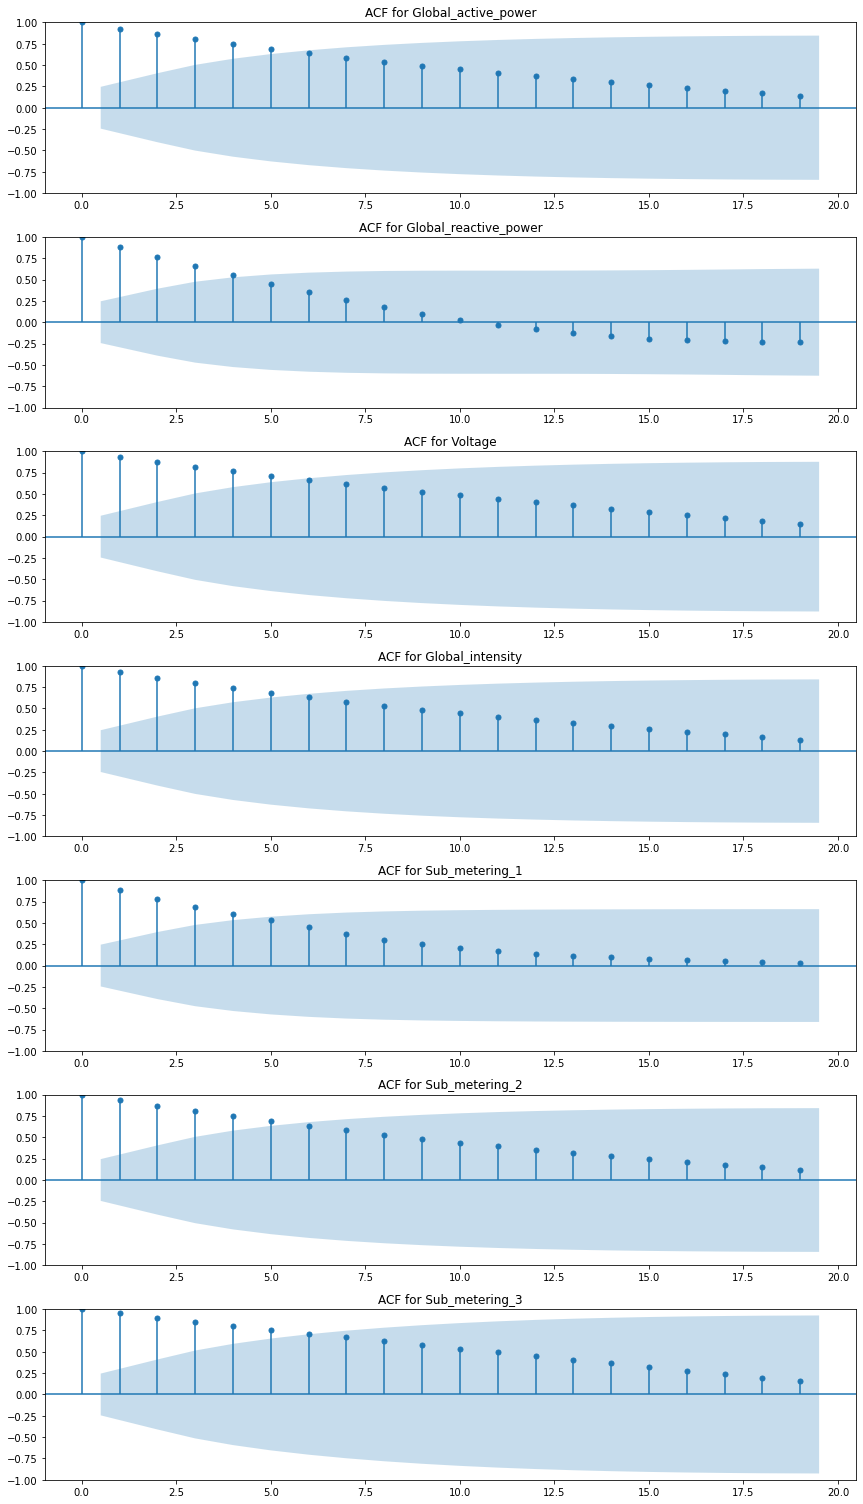

In [15]:
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with the numeric columns you want to analyze
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Create subplots to display ACF plots for each column
num_columns = len(numeric_columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(12, 3 * num_columns))

for i, col in enumerate(numeric_columns):
    # Compute the ACF for the current column
    ACF = acf(data[col], fft=True)
    
    # Plot the ACF for the current column
    sm.graphics.tsa.plot_acf(ACF, ax=axes[i])
    axes[i].set_title(f"ACF for {col}")

plt.tight_layout()
plt.show()


In [32]:
df_resample = data.resample('W').sum()

In [33]:
df_resample = df_resample.round({'Global_active_power': 3, 'Global_reactive_power': 3, 'Voltage': 2, 'Global_intensity': 2,'Sub_metering_1': 1, 'Sub_metering_2' : 1, 'Sub_metering_3': 1})
df_resample.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Timestamp,,,,,,,
2006-12-17,4599.636,260.928,439277.85,19579.40,2033.0,4733.0,18267.0
2006-12-24,17479.311,1176.421,2433005.86,74001.66,11192.2,21353.6,77459.9
2006-12-31,19738.701,1452.581,2438452.87,83032.26,14239.2,22630.6,67249.9
2007-01-07,11613.812,1105.972,2407593.62,49245.83,10774.1,8670.3,61420.5
2007-01-14,14332.550,1473.652,2409121.75,61140.21,24550.7,15055.6,69801.1
2007-01-21,16525.666,1376.902,2423636.71,70241.60,23435.0,20075.0,81512.0
2007-01-28,15295.672,1073.762,2439275.42,64484.43,11476.1,14944.3,72068.5
2007-02-04,11467.652,1143.846,2427870.94,48304.80,4001.0,9682.0,74965.0
2007-02-11,9779.230,1134.866,2395393.37,42227.00,10945.0,19775.0,55567.0


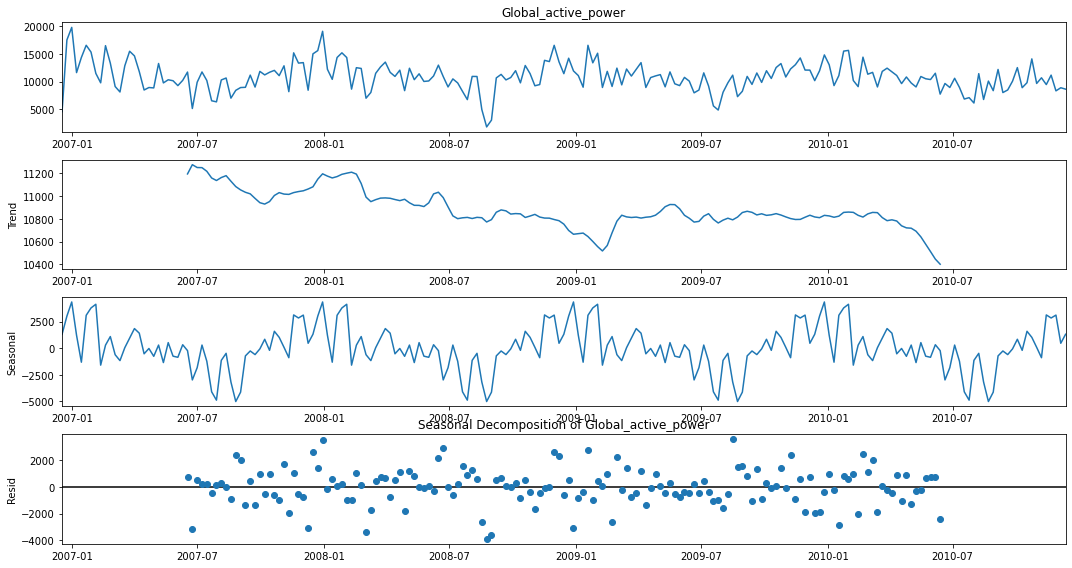

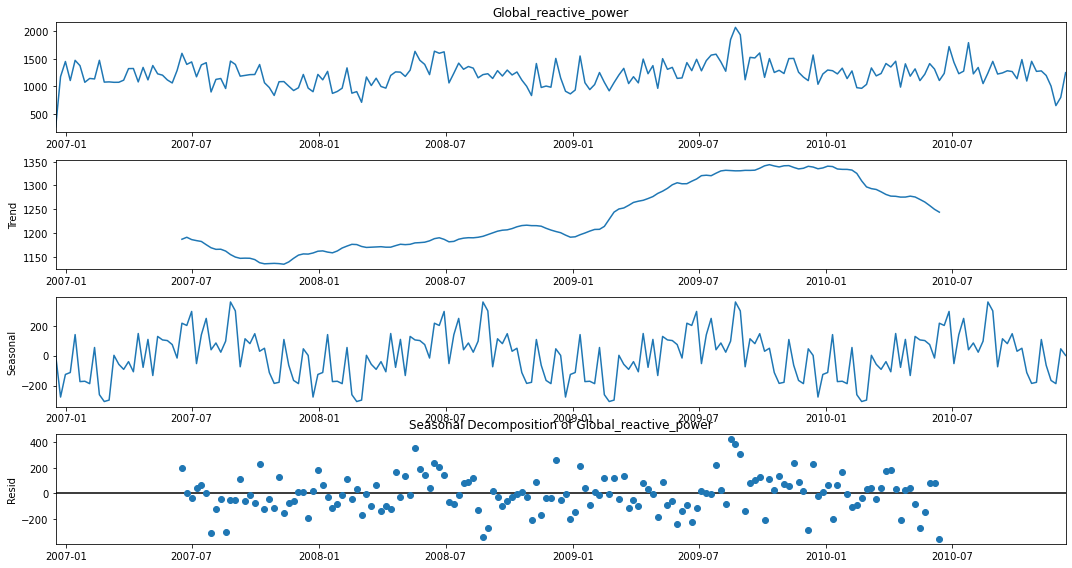

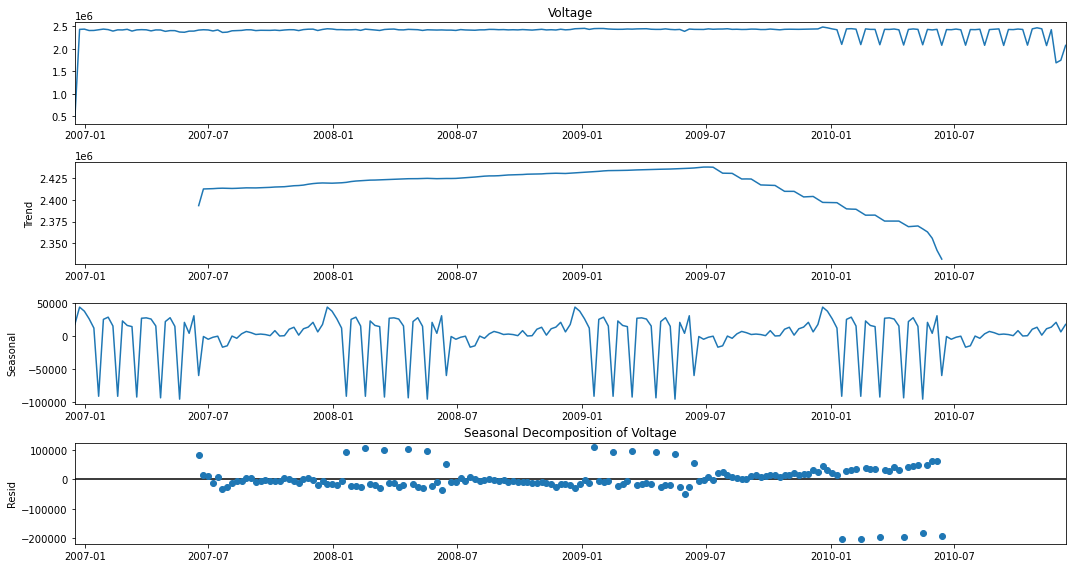

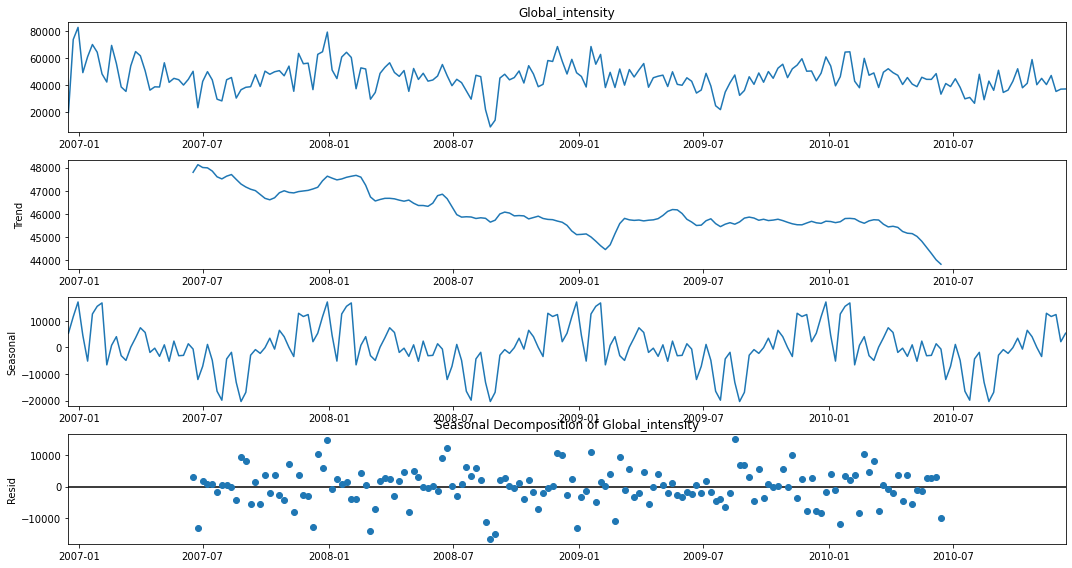

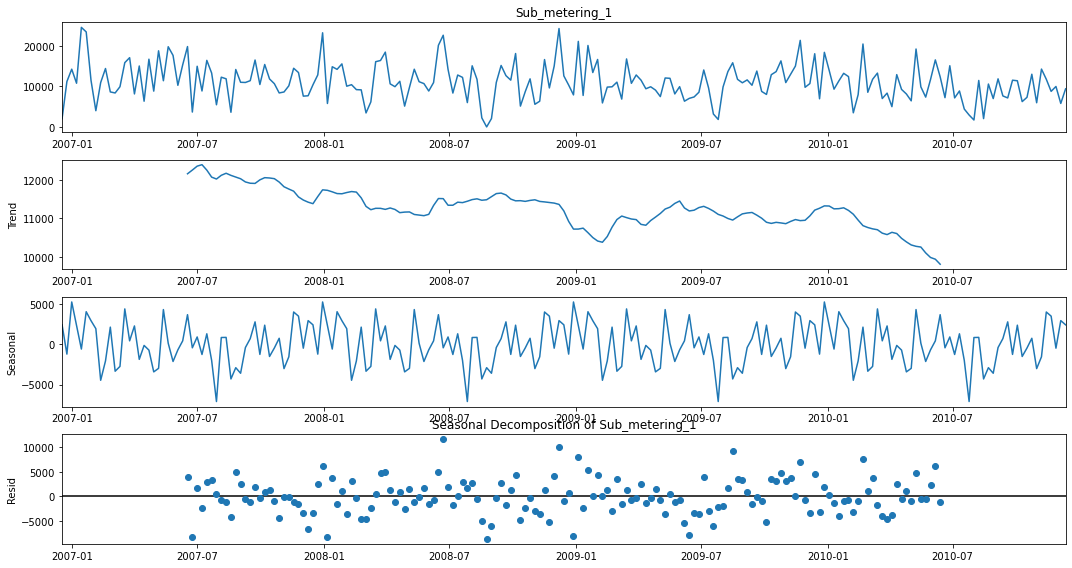

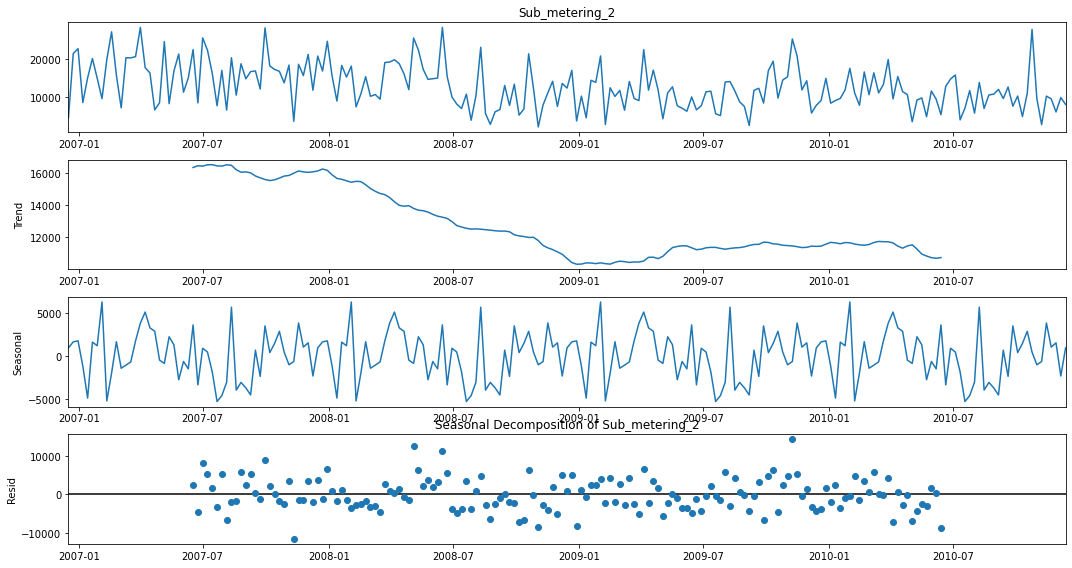

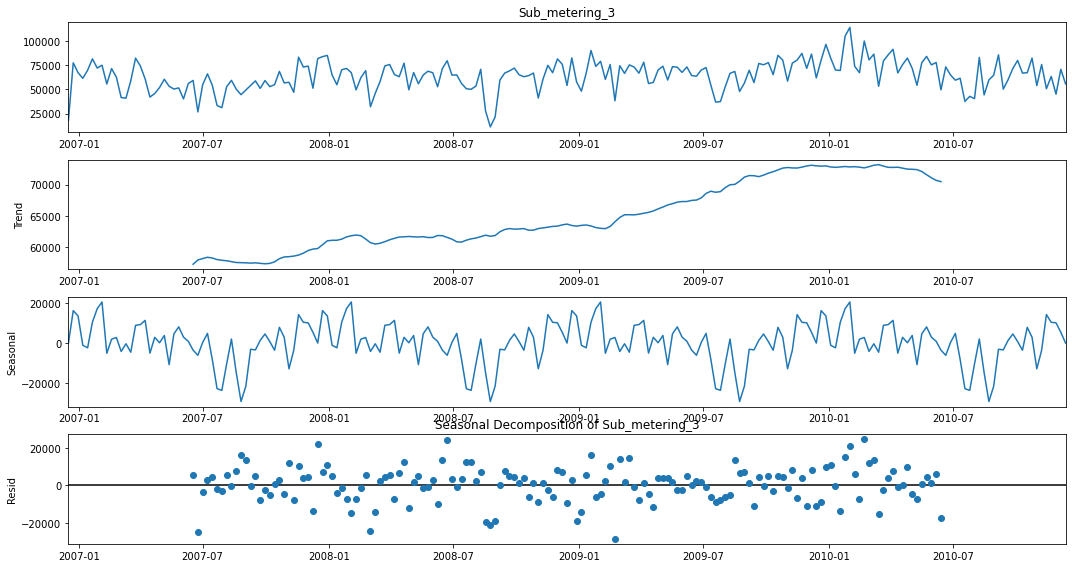

In [34]:
import statsmodels.api as sm
from pylab import rcParams

# Set the figure size
rcParams['figure.figsize'] = 15, 8

# Columns you want to apply decomposition to
columns_to_decompose = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Perform seasonal decomposition for each column
for column in columns_to_decompose:
    decompose_series = sm.tsa.seasonal_decompose(df_resample[column], model='additive')
    decompose_series.plot()
    plt.title(f"Seasonal Decomposition of {column}")
    plt.show()


In [19]:
pip install pmdarima

# **LSTM** - *minitues*

Epoch 1/25
51882/51882 [==============================] - 314s 6ms/step - loss: 7.5288e-04 - val_loss: 3.7999e-04
Epoch 2/25
51882/51882 [==============================] - 248s 5ms/step - loss: 7.0954e-04 - val_loss: 3.6917e-04
Epoch 3/25
51882/51882 [==============================] - 239s 5ms/step - loss: 6.9902e-04 - val_loss: 3.7413e-04
Epoch 4/25
51882/51882 [==============================] - 349s 7ms/step - loss: 6.9168e-04 - val_loss: 3.5783e-04
Epoch 5/25
51882/51882 [==============================] - 284s 5ms/step - loss: 6.8630e-04 - val_loss: 3.7996e-04
Epoch 6/25
51882/51882 [==============================] - 335s 6ms/step - loss: 6.7851e-04 - val_loss: 3.6853e-04
Epoch 7/25
51882/51882 [==============================] - 340s 7ms/step - loss: 6.7379e-04 - val_loss: 3.5163e-04
Epoch 8/25
51882/51882 [==============================] - 321s 6ms/step - loss: 6.7210e-04 - val_loss: 3.6963e-04
Epoch 9/25
51882/51882 [==============================] - 296s 6ms/step - loss: 6.6779e-

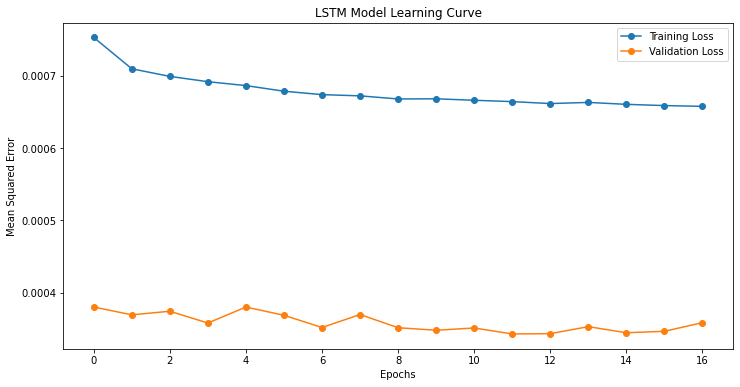

Mean Squared Error (LSTM): 0.0606865055894691


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# Assuming you have 'data' DataFrame with 'Timestamp' as the index and 'Global_active_power' as the target column
target_column = 'Global_active_power'

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data[[target_column]])

# Function to prepare data for LSTM
def prepare_lstm_data(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

# Set the time steps
time_steps = 10

# Prepare data for LSTM
x, y = prepare_lstm_data(data_normalized, time_steps)

# Reshape input data for LSTM [samples, time steps, features]
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Define the LSTM model with regularization and early stopping
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, activation='relu', input_shape=(time_steps, 1)))
model_lstm.add(Dropout(0.2))  # Adding dropout for regularization
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with validation split and early stopping
history = model_lstm.fit(x, y, epochs=25, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Make predictions using LSTM
lstm_predictions_normalized = model_lstm.predict(x)
lstm_predictions = scaler.inverse_transform(lstm_predictions_normalized)

# Extract training loss and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the learning curve
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('LSTM Model Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


# Evaluate the models using mean squared error
mse_lstm = mean_squared_error(data[target_column][time_steps:], lstm_predictions)
print(f'Mean Squared Error (LSTM): {mse_lstm}')


In [33]:
# Calculate Mean Squared Error
mse = mean_squared_error(data[target_column][time_steps:], lstm_predictions)
print(f'Mean Squared Error (MSE): {mse}')
rmse = np.sqrt(mean_squared_error(data[target_column][time_steps:], lstm_predictions))
print(f'RMSE: {rmse}')
from sklearn.metrics import r2_score

r2 = r2_score(data[target_column][time_steps:], lstm_predictions)
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error (MSE): 0.0606865055894691
RMSE: 0.24634631231148782
R-squared (R2) Score: 0.9450219495940828


# **LSTM** - Hourly

Epoch 1/50


c:\Users\preet\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


865/865 [==============================] - 4s 4ms/step - loss: 0.0164 - val_loss: 0.0085
Epoch 2/50
865/865 [==============================] - 4s 4ms/step - loss: 0.0127 - val_loss: 0.0077
Epoch 3/50
865/865 [==============================] - 4s 5ms/step - loss: 0.0117 - val_loss: 0.0074
Epoch 4/50
865/865 [==============================] - 4s 5ms/step - loss: 0.0112 - val_loss: 0.0072
Epoch 5/50
865/865 [==============================] - 4s 5ms/step - loss: 0.0110 - val_loss: 0.0071
Epoch 6/50
865/865 [==============================] - 4s 5ms/step - loss: 0.0109 - val_loss: 0.0071
Epoch 7/50
865/865 [==============================] - 4s 5ms/step - loss: 0.0108 - val_loss: 0.0070
Epoch 8/50
865/865 [==============================] - 4s 5ms/step - loss: 0.0107 - val_loss: 0.0069
Epoch 9/50
865/865 [==============================] - 4s 5ms/step - loss: 0.0107 - val_loss: 0.0071
Epoch 10/50
865/865 [==============================] - 4s 5ms/step - loss: 0.0107 - val_loss: 0.0070
Epoch 11/5

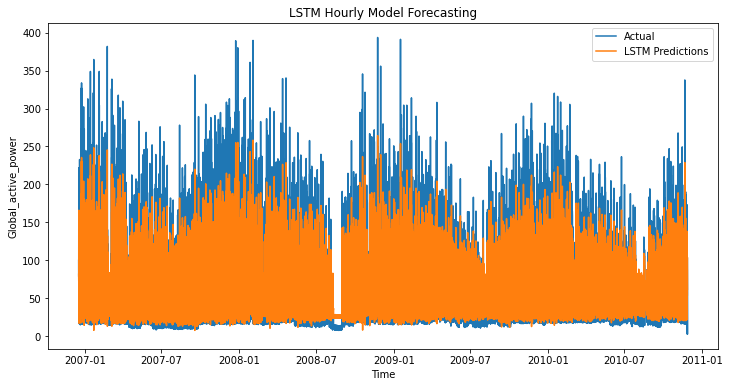

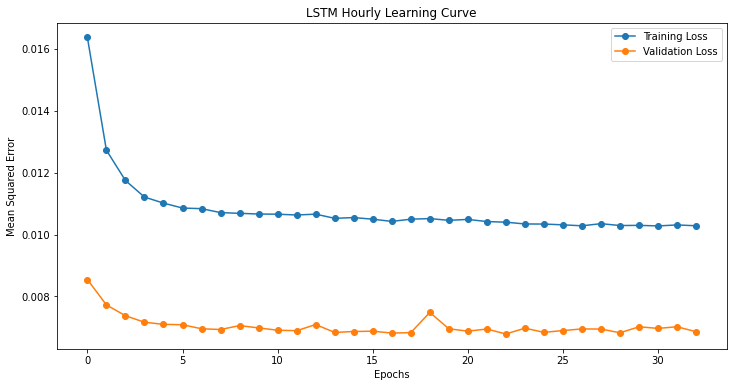

MSE for Hourly Predictions: 1335.784785763731
RMSE for Hourly Predictions: 36.548389646655174


NameError: name 'r2_score' is not defined

In [25]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Assuming you have 'data' DataFrame with 'Timestamp' as the index and 'Global_active_power' as the target column
target_column = 'Global_active_power'

# data['Timestamp'] = pd.to_datetime(data['Timestamp'])
# data.set_index('Timestamp', inplace=True)

# Group data by hours
data_hourly = data.resample('H').sum()

# Normalize the data
scaler_hourly = MinMaxScaler()
data_hourly_normalized = scaler_hourly.fit_transform(data_hourly[[target_column]])

# Function to prepare data for LSTM
def prepare_lstm_data(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

# Set the time steps
time_steps = 10

# Prepare data for LSTM
x_hourly, y_hourly = prepare_lstm_data(data_hourly_normalized, time_steps)

# Reshape input data for LSTM [samples, time steps, features]
x_hourly = np.reshape(x_hourly, (x_hourly.shape[0], x_hourly.shape[1], 1))

# Define the LSTM model with regularization and early stopping
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=25, activation='relu', input_shape=(time_steps, 1), kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))  # Increase dropout for regularization
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
    return model

# Train and predict for each subset
def train_and_predict(model, x, y, scaler):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(x, y, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
    predictions_normalized = model.predict(x)
    predictions = scaler.inverse_transform(predictions_normalized)
    return predictions, history

# Create LSTM model
model_hourly = create_lstm_model()

# Train and predict for hourly subset
lstm_predictions_hourly, history_hourly = train_and_predict(model_hourly, x_hourly, y_hourly, scaler_hourly)

# Plot results for hourly subset
def plot_results(actual, predictions, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index[time_steps:], actual[target_column][time_steps:], label='Actual')
    plt.plot(actual.index[time_steps:], predictions, label='LSTM Predictions')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()

plot_results(data_hourly, lstm_predictions_hourly, 'LSTM Hourly Model Forecasting')

# Plot learning curve for hourly subset
def plot_learning_curve(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

plot_learning_curve(history_hourly, 'LSTM Hourly Learning Curve')


# Calculate MSE for Hourly Predictions
mse_hourly = mean_squared_error(data_hourly[target_column][time_steps:], lstm_predictions_hourly)
print(f'MSE for Hourly Predictions: {mse_hourly}')

# Calculate RMSE for Hourly Predictions
rmse_hourly = sqrt(mse_hourly)
print(f'RMSE for Hourly Predictions: {rmse_hourly}')

# Calculate R-squared for Hourly Predictions

r2_hourly = r2_score(data_hourly[target_column][time_steps:], lstm_predictions_hourly)
print(f'R Squared for Hourly Predictions: {r2_hourly}')


# **LSTM** - Daily and Weekly

Epoch 1/50
36/36 [==============================] - 1s 12ms/step - loss: 0.0609 - val_loss: 0.0126
Epoch 2/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0145 - val_loss: 0.0073
Epoch 3/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0136 - val_loss: 0.0062
Epoch 4/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0126 - val_loss: 0.0063
Epoch 5/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0126 - val_loss: 0.0059
Epoch 6/50
36/36 [==============================] - 0s 7ms/step - loss: 0.0125 - val_loss: 0.0061
Epoch 7/50
36/36 [==============================] - 0s 7ms/step - loss: 0.0116 - val_loss: 0.0060
Epoch 8/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0118 - val_loss: 0.0062
Epoch 9/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0116 - val_loss: 0.0059
Epoch 10/50
36/36 [==============================] - 0s 5ms/step - loss: 0.0119 - val_loss: 0.0058
Epoch 11/50
36/36 

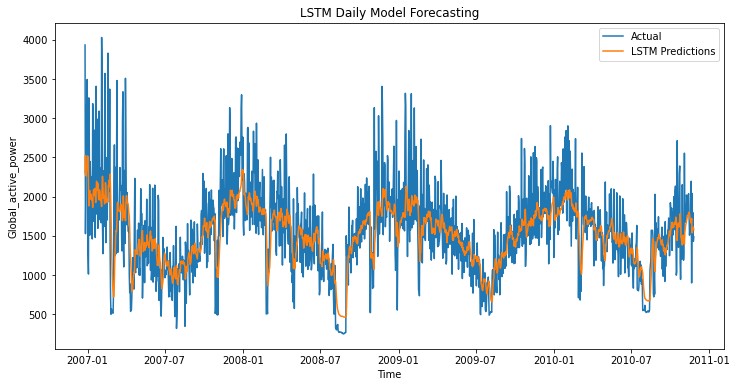

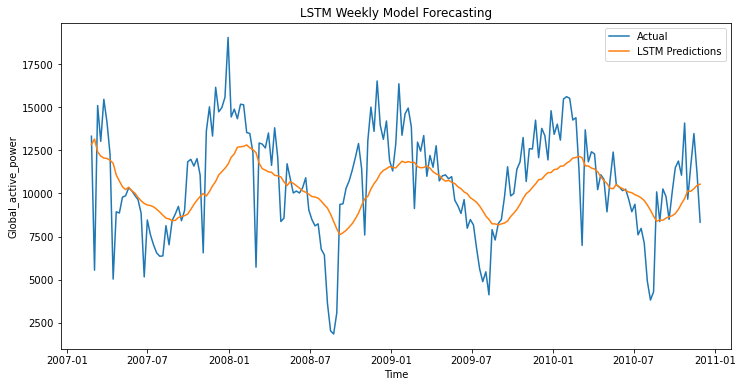

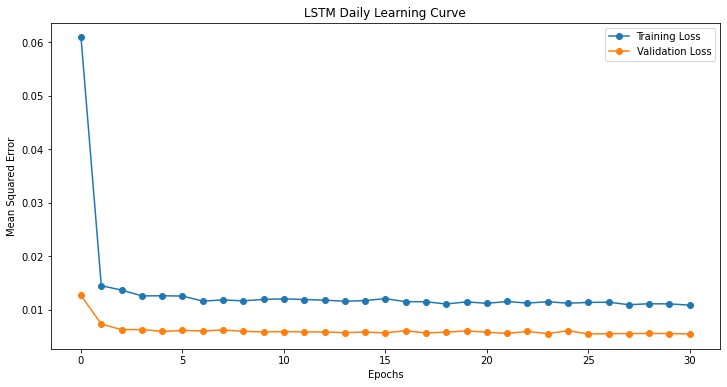

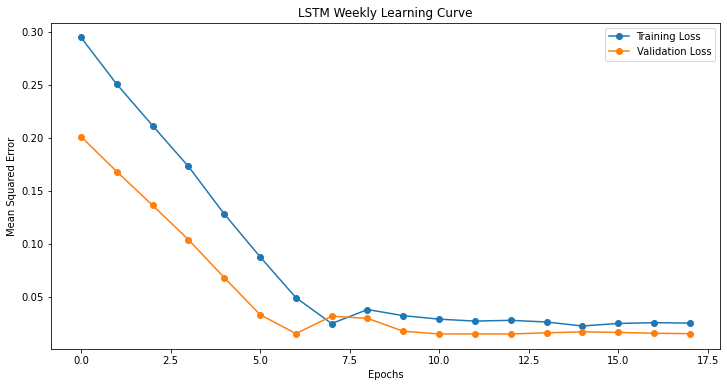

In [24]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# Assuming you have 'data' DataFrame with 'Timestamp' as the index and 'Global_active_power' as the target column
target_column = 'Global_active_power'

data_daily = data.resample('D').sum()
data_weekly = data.resample('W').sum()

# Normalize the data for each subset
scaler_hourly = MinMaxScaler()

scaler_daily = MinMaxScaler()
data_daily_normalized = scaler_daily.fit_transform(data_daily[[target_column]])

scaler_weekly = MinMaxScaler()
data_weekly_normalized = scaler_weekly.fit_transform(data_weekly[[target_column]])

# Function to prepare data for LSTM
def prepare_lstm_data(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 10  

x_daily, y_daily = prepare_lstm_data(data_daily_normalized, time_steps)
x_weekly, y_weekly = prepare_lstm_data(data_weekly_normalized, time_steps)

x_daily = np.reshape(x_daily, (x_daily.shape[0], x_daily.shape[1], 1))
x_weekly = np.reshape(x_weekly, (x_weekly.shape[0], x_weekly.shape[1], 1))

def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(time_steps, 1)))
    model.add(Dropout(0.2))  
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_and_predict(model, x, y, scaler):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(x, y, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
    predictions_normalized = model.predict(x)
    predictions = scaler.inverse_transform(predictions_normalized)
    return predictions, history

model_daily = create_lstm_model()
model_weekly = create_lstm_model()

lstm_predictions_daily, history_daily = train_and_predict(model_daily, x_daily, y_daily, scaler_daily)
lstm_predictions_weekly, history_weekly = train_and_predict(model_weekly, x_weekly, y_weekly, scaler_weekly)

# Plot results for each subset
def plot_results(actual, predictions, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index[time_steps:], actual[target_column][time_steps:], label='Actual')
    plt.plot(actual.index[time_steps:], predictions, label='LSTM Predictions')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()

plot_results(data_daily, lstm_predictions_daily, 'LSTM Daily Model Forecasting')
plot_results(data_weekly, lstm_predictions_weekly, 'LSTM Weekly Model Forecasting')

# Plot learning curves
def plot_learning_curve(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

plot_learning_curve(history_daily, 'LSTM Daily Learning Curve')
plot_learning_curve(history_weekly, 'LSTM Weekly Learning Curve')

In [31]:
mse_daily = mean_squared_error(data_daily[target_column][time_steps:], lstm_predictions_daily)
rmse_daily = sqrt(mse_daily)
r2_daily = r2_score(data_daily[target_column][time_steps:], lstm_predictions_daily)

print(f'MSE for Daily Predictions: {mse_daily}')
print(f'RMSE for Daily Predictions: {rmse_daily}')
print(f'R Squared for Daily Predictions: {r2_daily}')

# Calculate MSE, RMSE, and R-squared for Weekly Predictions
mse_weekly = mean_squared_error(data_weekly[target_column][time_steps:], lstm_predictions_weekly)
rmse_weekly = sqrt(mse_weekly)
r2_weekly = r2_score(data_weekly[target_column][time_steps:], lstm_predictions_weekly)

print(f'MSE for Weekly Predictions: {mse_weekly}')
print(f'RMSE for Weekly Predictions: {rmse_weekly}')
print(f'R Squared for Weekly Predictions: {r2_weekly}')

MSE for Daily Predictions: 184985.2661135338
RMSE for Daily Predictions: 430.09913521597997
R Squared for Daily Predictions: 0.46301242182213087
MSE for Weekly Predictions: 6175406.318524772
RMSE for Weekly Predictions: 2485.036482332759
R Squared for Weekly Predictions: 0.3427770378068907


In [18]:
pip install prophet

  Using cached prophet-1.1.5-py3-none-win_amd64.whl (13.3 MB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
  Using cached cmdstanpy-1.2.0-py3-none-any.whl (93 kB)
  Using cached holidays-0.37-py3-none-any.whl (851 kB)
  Using cached stanio-0.3.0-py3-none-any.whl (6.2 kB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install --upgrade cmdstanpy


# **prophet**-Minitues -
 ( Code is present in another file)

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

# Assuming you have 'data' DataFrame with 'Timestamp' as the index and 'Global_active_power' as the target column
target_column = 'Global_active_power'

# Prepare data for Prophet
prophet_data = data.reset_index()[['Timestamp', target_column]]
prophet_data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model_prophet = Prophet(mcmc_samples=50)
model_prophet.fit(prophet_data,timeout=1600)

# Make future dataframe for predictions
future = model_prophet.make_future_dataframe(periods=365)  # Assuming one year forecast

# Generate predictions
forecast = model_prophet.predict(future)

# Plot the forecast
fig = model_prophet.plot(forecast)
plt.show()

# Evaluate the model using additional measures
actual_values = prophet_data['y'].values
predicted_values = forecast['yhat'][:-365].values  # Exclude the forecasted part for evaluation

mse_prophet = mean_squared_error(actual_values, predicted_values)
rmse_prophet = sqrt(mse_prophet)
r2_prophet = r2_score(actual_values, predicted_values)

print(f'Mean Squared Error (Prophet): {mse_prophet}')
print(f'Root Mean Squared Error (Prophet): {rmse_prophet}')
print(f'R-squared (Prophet): {r2_prophet}')


# **Prohet** - Hourly, weekly, daily

In [16]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Assuming you have 'data' DataFrame with 'Timestamp' as the index and 'Global_active_power' as the target column
target_column = 'Global_active_power'

# Ensure 'Timestamp' is a datetime column (convert if needed)
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set 'Timestamp' as the index
data.set_index('Timestamp', inplace=True)

# Group data by hours, days, and weeks
data_hourly = data.resample('H').sum()
data_daily = data.resample('D').sum()
data_weekly = data.resample('W').sum()

# Function to prepare data for Prophet
def prepare_prophet_data(data):
    return data.reset_index().rename(columns={'Timestamp': 'ds', target_column: 'y'})

# Prepare data for Prophet
prophet_data_hourly = prepare_prophet_data(data_hourly)
prophet_data_daily = prepare_prophet_data(data_daily)
prophet_data_weekly = prepare_prophet_data(data_weekly)

# Function to evaluate a Prophet model and return RMSE
def evaluate_prophet_model(data):
    train_size = int(len(data) * 0.8)
    train_prophet, test_prophet = data.iloc[:train_size], data.iloc[train_size:]
    
    # Fit Prophet model
    model = Prophet()
    model.fit(train_prophet)
    
    # Make future dataframe for forecasting
    future = model.make_future_dataframe(periods=len(test_prophet), freq='H')
    
    # Forecast
    forecast = model.predict(future)
    
    # Calculate out-of-sample error (RMSE)
    rmse = sqrt(mean_squared_error(test_prophet['y'], forecast['yhat'][-len(test_prophet):]))
    return rmse

# Evaluate Prophet for each subset
rmse_hourly = evaluate_prophet_model(prophet_data_hourly)
print(f'Prophet RMSE for hourly subset: {rmse_hourly}')

rmse_daily = evaluate_prophet_model(prophet_data_daily)
print(f'Prophet RMSE for daily subset: {rmse_daily}')

rmse_weekly = evaluate_prophet_model(prophet_data_weekly)
print(f'Prophet RMSE for weekly subset: {rmse_weekly}')


20:28:58 - cmdstanpy - INFO - Chain [1] start processing
20:29:03 - cmdstanpy - INFO - Chain [1] done processing
20:29:07 - cmdstanpy - INFO - Chain [1] start processing


Prophet RMSE for hourly subset: 41.684590665935296


20:29:08 - cmdstanpy - INFO - Chain [1] done processing
20:29:08 - cmdstanpy - INFO - Chain [1] start processing
20:29:08 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE for daily subset: 557.8539123442347
Prophet RMSE for weekly subset: 1717.5187549743946


23:00:47 - cmdstanpy - INFO - Chain [1] start processing
23:00:51 - cmdstanpy - INFO - Chain [1] done processing


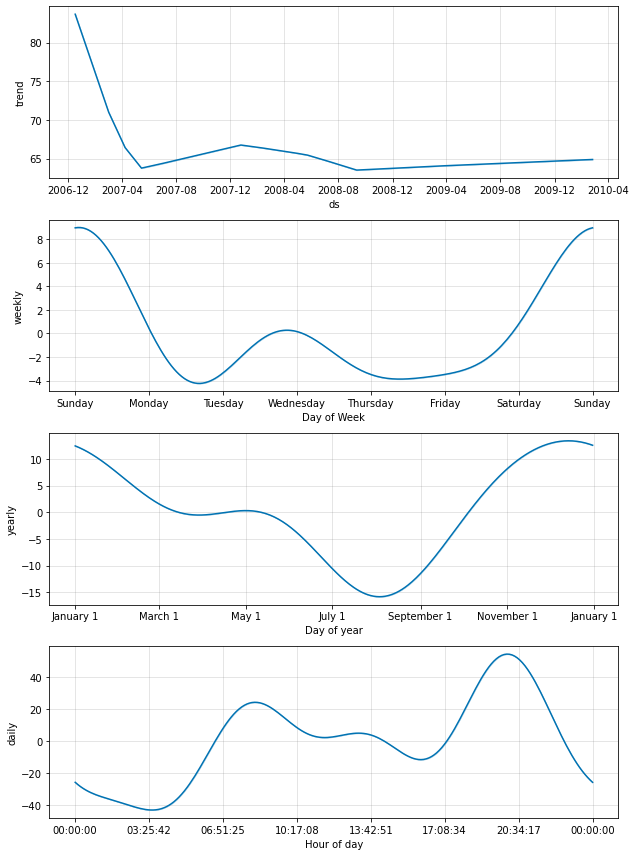

23:00:55 - cmdstanpy - INFO - Chain [1] start processing


Prophet RMSE for hourly subset: 59.69987695547404


23:00:55 - cmdstanpy - INFO - Chain [1] done processing


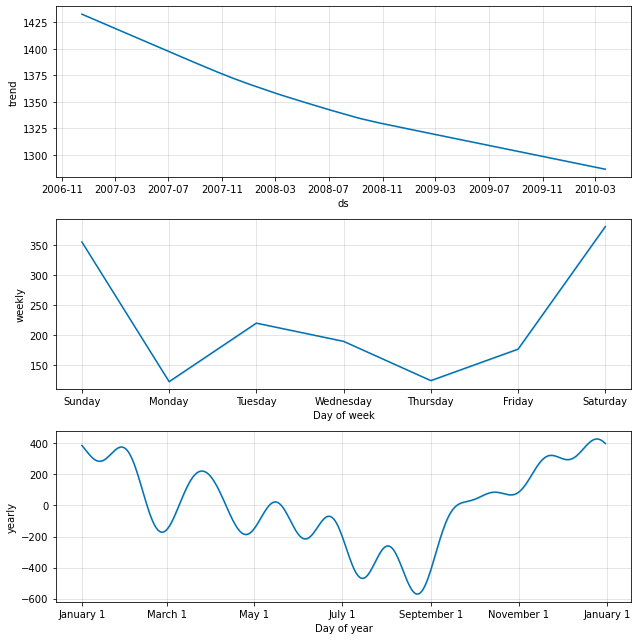

23:00:55 - cmdstanpy - INFO - Chain [1] start processing
23:00:55 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE for daily subset: 648.2388170833444


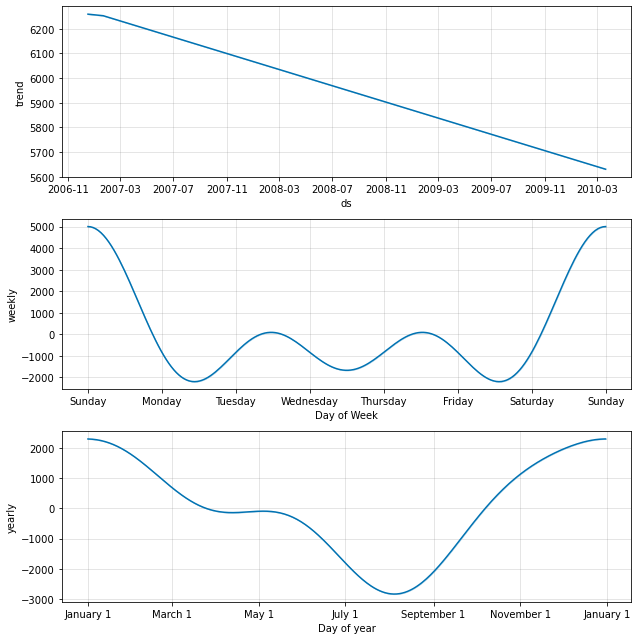

Prophet RMSE for weekly subset: 2827.26876144079


In [65]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Assuming you have 'data' DataFrame with 'Timestamp' as the index and 'Global_active_power' as the target column
target_column = 'Global_active_power'

data.set_index('Timestamp', inplace=True)

# Function to prepare data for Prophet
def prepare_prophet_data(data):
    return data.reset_index().rename(columns={'Timestamp': 'ds', target_column: 'y'})

# Function to evaluate a Prophet model and return RMSE
def evaluate_prophet_model(data, frequency, periods, seasonality_order):
    train_size = int(len(data) * 0.8)
    train_prophet, test_prophet = data.iloc[:train_size], data.iloc[train_size:]
    
    # Fit Prophet model
    model = Prophet()
    
    # Add weekly, seasonal (yearly), and holiday components
    model.add_seasonality(name='weekly', period=7, fourier_order=seasonality_order)
    model.add_seasonality(name='yearly', period=365.25, fourier_order=seasonality_order)
    
    # You can add holidays if available in your data
    # model.add_holidays(pd.DataFrame({'holiday': 'your_holiday_name', 'ds': pd.to_datetime(['your_holiday_dates'])}))
    
    model.fit(train_prophet)
    
    # Make future dataframe for forecasting
    future = model.make_future_dataframe(periods=periods, freq=frequency)
    
    # Forecast
    forecast = model.predict(future)
    
    # Calculate out-of-sample error (RMSE)
    rmse = sqrt(mean_squared_error(test_prophet['y'], forecast['yhat'][-len(test_prophet):]))
    
    # Plot the components
    fig = model.plot_components(forecast)
    plt.show()
    
    return rmse

# Group data by hours, days, and weeks
data_hourly = data.resample('H').sum()
data_daily = data.resample('D').sum()
data_weekly = data.resample('W').sum()

# Prepare data for Prophet
prophet_data_hourly = prepare_prophet_data(data_hourly)
prophet_data_daily = prepare_prophet_data(data_daily)
prophet_data_weekly = prepare_prophet_data(data_weekly)

# Evaluate Prophet for each subset
rmse_hourly = evaluate_prophet_model(prophet_data_hourly, frequency='H', periods=24, seasonality_order=3)
print(f'Prophet RMSE for hourly subset: {rmse_hourly}')

rmse_daily = evaluate_prophet_model(prophet_data_daily, frequency='D', periods=30, seasonality_order=10)
print(f'Prophet RMSE for daily subset: {rmse_daily}')

rmse_weekly = evaluate_prophet_model(prophet_data_weekly, frequency='W', periods=4, seasonality_order=3)
print(f'Prophet RMSE for weekly subset: {rmse_weekly}')


# **ARIMA** - Hourly, Daily and Monthy

In [20]:
import pandas as pd
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have 'data' DataFrame with 'Timestamp' as the index and 'Global_active_power' as the target column
target_column = 'Global_active_power'
# data.set_index('Timestamp', inplace=True)

# Function to prepare data for ARIMA
def prepare_arima_data(data, freq):
    return data[target_column].resample(freq).sum()

# Set the frequency for resampling
freq_hourly = 'H'
arima_data_hourly = prepare_arima_data(data, freq_hourly)

# Function to fit ARIMA model and make predictions
def fit_arima_model(data, order, seasonal_order):
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
    results = model.fit(disp=False)
    predictions = results.get_forecast(steps=len(data)).predicted_mean
    return predictions

# Order selection using auto_arima
order_hourly = pm.auto_arima(arima_data_hourly, suppress_warnings=True, seasonal=True, m=24)

# Print the best order values
best_order_hourly = order_hourly.order
print(f'Best ARIMA Order (Hourly): {best_order_hourly}')

# Fit ARIMA model and make predictions
arima_predictions_hourly = fit_arima_model(arima_data_hourly, best_order_hourly, (1, 1, 1, 24))

# Evaluate the models using mean squared error
mse_hourly = mean_squared_error(arima_data_hourly, arima_predictions_hourly)
print(f'Mean Squared Error (Hourly): {mse_hourly}')

# Set the frequency for resampling
freq_daily = 'D'
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
arima_data_daily = prepare_arima_data(data, freq_daily)

# Order selection using auto_arima
order_daily = pm.auto_arima(arima_data_daily, suppress_warnings=True, seasonal=True, m=7)

# Print the best order values
best_order_daily = order_daily.order
print(f'Best ARIMA Order (Daily): {best_order_daily}')

# Fit ARIMA models and make predictions
arima_predictions_daily = fit_arima_model(arima_data_daily, best_order_daily, (1, 1, 2, 7))


# Evaluate the models using mean squared error
mse_daily = mean_squared_error(arima_data_daily, arima_predictions_daily)
print(f'Mean Squared Error (Daily): {mse_daily}')

# Set the frequency for resampling
freq_monthly = 'M'
arima_data_monthly = prepare_arima_data(data, freq_monthly)

# Order selection using auto_arima
order_monthly = pm.auto_arima(arima_data_monthly, suppress_warnings=True, seasonal=True, m=12)

# Print the best order values
best_order_monthly = order_monthly.order
print(f'Best ARIMA Order (Monthly): {best_order_monthly}')

# Fit ARIMA models and make predictions
arima_predictions_monthly = fit_arima_model(arima_data_monthly, best_order_monthly, (1, 0, 0, 12))

# Evaluate the models using mean squared error
mse_monthly = mean_squared_error(arima_data_monthly, arima_predictions_monthly)
print(f'Mean Squared Error (Monthly): {mse_monthly}')


Best ARIMA Order (Hourly): (0, 1, 2)
Mean Squared Error (Hourly): 7.599008301979268
Best ARIMA Order (Daily): (2, 1, 2)
Mean Squared Error (Daily): 191.23285078782942
Best ARIMA Order (Monthly): (1, 0, 0)
Mean Squared Error (Monthly): 516142.46327663306


# **Arima** - 2007 year data(minitues)

In [50]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings


target_column = 'Global_active_power'
# data.set_index('Timestamp', inplace=True)

# Convert the index to datetime and set the frequency
data.index = pd.to_datetime(data.index)
data = data.asfreq('H')  # Adjust the frequency based on your data (e.g., 'H' for hourly data)

# Function to prepare data for ARIMA
def prepare_arima_data(data):
    return data[target_column]

# Filter data for the year 2007
data_2007 = data[(data.index >= '2007-01-01') & (data.index <= '2007-12-31')]

# Prepare data for ARIMA
arima_data_2007 = prepare_arima_data(data_2007)

# Manual grid search for ARIMA order (p, d, q)
best_score, best_order = float("inf"), None

for p in range(6):  # Adjust the range based on your preference
    for d in range(3):  # Adjust the range based on your preference
        for q in range(6):  # Adjust the range based on your preference
            order = (p, d, q)
            try:
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                # Fit ARIMA model
                model = ARIMA(arima_data_2007, order=order)
                results = model.fit()

                # Make predictions
                arima_predictions_2007 = results.get_forecast(steps=len(arima_data_2007)).predicted_mean

                # Evaluate the model using mean squared error
                mse = mean_squared_error(arima_data_2007, arima_predictions_2007)

                if mse < best_score:
                    best_score, best_order = mse, order

            except Exception as e:
                continue

# Print the best order values
print(f'Best ARIMA Order (2007 Data): {best_order}')

# Fit ARIMA model with the best order
best_model = ARIMA(arima_data_2007, order=best_order)
best_results = best_model.fit()
arima_predictions_2007 = best_results.get_forecast(steps=len(arima_data_2007)).predicted_mean

# Evaluate the model using mean squared error
mse_2007 = mean_squared_error(arima_data_2007, arima_predictions_2007)
print(f'Mean Squared Error (2007 Data): {mse_2007}')

rmse_2007 = mse_2007 ** 0.5
print(f'RMSE (2007 Data): {rmse_2007}')

mae_2007 = abs(arima_data_2007 - arima_predictions_2007).mean()
print(f'Mean Absolute Error (2007 Data): {mae_2007}')

mape_2007 = (abs(arima_data_2007 - arima_predictions_2007) / arima_data_2007).mean() * 100
print(f'MAPE (2007 Data): {mape_2007}')

from sklearn.metrics import r2_score
r2_2007 = r2_score(arima_data_2007, arima_predictions_2007)
print(f'R-squared (2007 Data): {r2_2007}')


c:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\state

Best ARIMA Order (2007 Data): (5, 0, 5)


c:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error (2007 Data): 1.3254336495762937
RMSE (2007 Data): 1.1512747932515042
Mean Absolute Error (2007 Data): nan
MAPE (2007 Data): nan
R-squared (2007 Data): 0.005545868776699603


# **Hybrid** - LSTM AND ARIMA(HOURLY)

In [15]:
import numpy as np
import pandas as pd
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming you have 'data' DataFrame with 'Timestamp' as the index and 'Global_active_power' as the target column
target_column = 'Global_active_power'
data.set_index('Timestamp', inplace=True)

# Function to prepare data for ARIMA
def prepare_arima_data(data, freq):
    return data[target_column].resample(freq).sum()

# Set the frequency for resampling
freq_hourly = 'H'
arima_data_hourly = prepare_arima_data(data, freq_hourly)

# Create LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=100, activation='relu', input_shape=input_shape))  # Increase LSTM units
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to prepare data for LSTM
def prepare_lstm_data(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

# Set the time steps
time_steps = 10
scaler_lstm = MinMaxScaler()

# Prepare data for LSTM
data_normalized = scaler_lstm.fit_transform(arima_data_hourly.values.reshape(-1, 1))
x_lstm, y_lstm = prepare_lstm_data(data_normalized, time_steps)
x_lstm = np.reshape(x_lstm, (x_lstm.shape[0], x_lstm.shape[1], 1))

# Create and train LSTM model
lstm_model = create_lstm_model(input_shape=(time_steps, 1))
lstm_model.fit(x_lstm, y_lstm, epochs=50, batch_size=32)  # Increase training epochs

# Predictions from LSTM model
lstm_predictions_normalized = lstm_model.predict(x_lstm)
lstm_predictions = scaler_lstm.inverse_transform(lstm_predictions_normalized)

# Extract residuals
residuals = arima_data_hourly.values[time_steps:] - lstm_predictions.flatten()

# Manually set ARIMA hyperparameters
order_arima = (2, 1, 2) 

# Train ARIMA model on residuals
arima_model = SARIMAX(residuals, order=order_arima)
arima_results = arima_model.fit(disp=False)
arima_predictions_residuals = arima_results.get_forecast(steps=len(residuals)).predicted_mean

# Combine LSTM and ARIMA predictions
hybrid_predictions = lstm_predictions.flatten() + arima_predictions_residuals

# Evaluate the hybrid model using mean squared error
mse_hybrid = mean_squared_error(arima_data_hourly.values[time_steps:], hybrid_predictions)
print(f'Mean Squared Error (Hybrid): {mse_hybrid}')
rmse_hybrid = np.sqrt(mse_hybrid)
mae_hybrid = np.mean(np.abs(arima_data_hourly.values[time_steps:] - hybrid_predictions))
mape_hybrid = np.mean(np.abs((arima_data_hourly.values[time_steps:] - hybrid_predictions) / arima_data_hourly.values[time_steps:])) * 100
from sklearn.metrics import r2_score
r2_hybrid = r2_score(arima_data_hourly.values[time_steps:], hybrid_predictions)



Epoch 1/50
1081/1081 [==============================] - 9s 7ms/step - loss: 0.0102
Epoch 2/50
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0090
Epoch 3/50
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0088
Epoch 4/50
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0087
Epoch 5/50
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0086
Epoch 6/50
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0086
Epoch 7/50
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0086
Epoch 8/50
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0085
Epoch 9/50
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0085
Epoch 10/50
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0085
Epoch 11/50
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0085
Epoch 12/50
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0085
E

KeyboardInterrupt: 

In [48]:
print(f'Mean Squared Error (Hybrid): {mse_hybrid}')
print(f'Root Mean Squared Error (Hybrid): {rmse_hybrid}')
print(f'Mean Absolute Error (Hybrid): {mae_hybrid}')
print(f'Mean Absolute Percentage Error (Hybrid): {mape_hybrid}')
print(f'R-squared (R2) Score (Hybrid): {r2_hybrid}')

Mean Squared Error (Hybrid): 1261.9013998823596
Root Mean Squared Error (Hybrid): 35.52325153870855
Mean Absolute Error (Hybrid): 24.103136493841333
Mean Absolute Percentage Error (Hybrid): inf
R-squared (R2) Score (Hybrid): 0.5611287382215568


# **Hybrid** - LSTM AND ARIMA(HOURLY, DAILY, WEEKLY)

Epoch 1/50
973/973 [==============================] - 14s 12ms/step - loss: 0.0185 - val_loss: 0.0099
Epoch 2/50
973/973 [==============================] - 11s 12ms/step - loss: 0.0159 - val_loss: 0.0102
Epoch 3/50
973/973 [==============================] - 11s 12ms/step - loss: 0.0156 - val_loss: 0.0098
Epoch 4/50
973/973 [==============================] - 11s 12ms/step - loss: 0.0152 - val_loss: 0.0091
Epoch 5/50
973/973 [==============================] - 11s 12ms/step - loss: 0.0151 - val_loss: 0.0092
Epoch 6/50
973/973 [==============================] - 11s 12ms/step - loss: 0.0151 - val_loss: 0.0093
Epoch 7/50
973/973 [==============================] - 12s 12ms/step - loss: 0.0149 - val_loss: 0.0091
Epoch 8/50
973/973 [==============================] - 11s 12ms/step - loss: 0.0148 - val_loss: 0.0094
Epoch 9/50
973/973 [==============================] - 11s 12ms/step - loss: 0.0149 - val_loss: 0.0090
Epoch 10/50
973/973 [==============================] - 11s 12ms/step - loss: 0.014

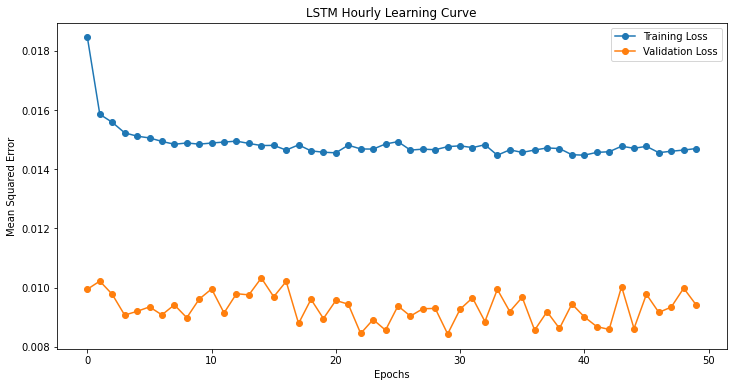

In [33]:
import numpy as np
import pandas as pd
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


def prepare_arima_data(data, freq):
    return data['Global_active_power'].resample(freq).sum()

# Set the frequency for resampling
freq_hourly = 'H'

arima_data_hourly = prepare_arima_data(data, freq_hourly)
arima_data_daily = prepare_arima_data(data, freq_daily)
arima_data_weekly = prepare_arima_data(data, freq_weekly)

# Function to fit auto ARIMA model
def fit_auto_arima(data):
    model = pm.auto_arima(data, suppress_warnings=True, seasonal=False)
    return model

# Function to prepare data for LSTM
def prepare_lstm_data(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

# Set the time steps
time_steps = 10
scaler_lstm = MinMaxScaler()

# Prepare data for LSTM for hourly
data_normalized_hourly = scaler_lstm.fit_transform(arima_data_hourly.values.reshape(-1, 1))
x_lstm_hourly, y_lstm_hourly = prepare_lstm_data(data_normalized_hourly, time_steps)
x_lstm_hourly = np.reshape(x_lstm_hourly, (x_lstm_hourly.shape[0], x_lstm_hourly.shape[1], 1))

# Create and train LSTM model for hourly data
lstm_model_hourly = Sequential()
lstm_model_hourly.add(LSTM(units=75, activation='relu', input_shape=(time_steps, 1), dropout=0.5, recurrent_dropout=0.5, kernel_regularizer='l2'))
lstm_model_hourly.add(Dense(units=1))
lstm_model_hourly.compile(optimizer='adam', loss='mean_squared_error')

# Fit LSTM model and get the history for learning curves
history_hourly = lstm_model_hourly.fit(x_lstm_hourly, y_lstm_hourly, epochs=50, batch_size=32, validation_split=0.1)

# Predictions from LSTM model for hourly data
lstm_predictions_normalized_hourly = lstm_model_hourly.predict(x_lstm_hourly)
lstm_predictions_hourly = scaler_lstm.inverse_transform(lstm_predictions_normalized_hourly)

# Extract residuals for hourly data
residuals_hourly = arima_data_hourly.values[time_steps:] - lstm_predictions_hourly.flatten()

# Train ARIMA model on residuals for hourly data
arima_model_residuals_hourly = fit_auto_arima(residuals_hourly)
order_residuals_hourly = arima_model_residuals_hourly.get_params()['order']

print(f'Auto ARIMA Order for Hourly Residuals: {order_residuals_hourly}')

# Plot learning curves
def plot_learning_curve(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

# Plot learning curve for hourly data
plot_learning_curve(history_hourly, 'LSTM Hourly Learning Curve')


Epoch 1/50
973/973 [==============================] - 17s 16ms/step - loss: 0.0190 - val_loss: 0.0112
Epoch 2/50
973/973 [==============================] - 21s 21ms/step - loss: 0.0163 - val_loss: 0.0102
Epoch 3/50
973/973 [==============================] - 22s 23ms/step - loss: 0.0156 - val_loss: 0.0101
Epoch 4/50
973/973 [==============================] - 29s 29ms/step - loss: 0.0154 - val_loss: 0.0094
Epoch 5/50
973/973 [==============================] - 23s 24ms/step - loss: 0.0153 - val_loss: 0.0092
Epoch 6/50
973/973 [==============================] - 24s 25ms/step - loss: 0.0151 - val_loss: 0.0093
Epoch 7/50
973/973 [==============================] - 26s 27ms/step - loss: 0.0151 - val_loss: 0.0093
Epoch 8/50
973/973 [==============================] - 25s 26ms/step - loss: 0.0151 - val_loss: 0.0091
Epoch 9/50
973/973 [==============================] - 14s 14ms/step - loss: 0.0150 - val_loss: 0.0095
Epoch 10/50
973/973 [==============================] - 20s 21ms/step - loss: 0.014

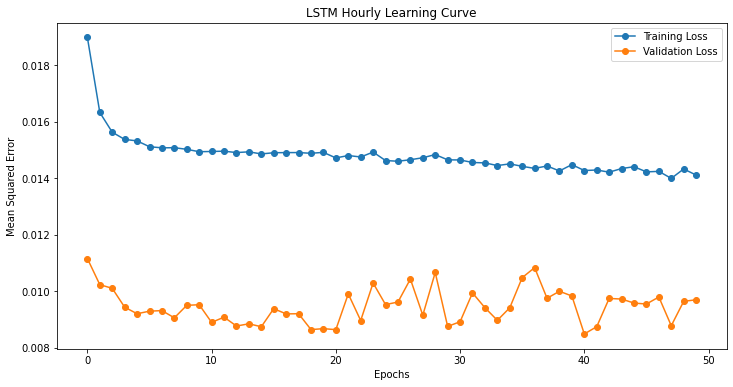

Mean Squared Error (LSTM Hourly): 2260.6007198110865
Root Mean Squared Error (LSTM Hourly): 47.545774994326116
Mean Absolute Percentage Error (LSTM Hourly): 104.04%
AIC for ARIMA on Hourly Residuals: 351407.5056128503


In [38]:
import numpy as np
import pandas as pd
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming you have 'data' DataFrame with 'Timestamp' as the index and 'Global_active_power' as the target column
target_column = 'Global_active_power'

# Set the frequency for resampling
freq_hourly = 'H'

arima_data_hourly = data[target_column].resample(freq_hourly).sum()
arima_data_daily = data[target_column].resample('D').sum()
arima_data_weekly = data[target_column].resample('W').sum()

# Function to fit auto ARIMA model
def fit_auto_arima(data):
    model = pm.auto_arima(data, suppress_warnings=True, seasonal=False)
    return model

# Function to prepare data for LSTM
def prepare_lstm_data(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

# Set the time steps
time_steps = 10
scaler_lstm = MinMaxScaler()

# Prepare data for LSTM for hourly
data_normalized_hourly = scaler_lstm.fit_transform(arima_data_hourly.values.reshape(-1, 1))
x_lstm_hourly, y_lstm_hourly = prepare_lstm_data(data_normalized_hourly, time_steps)
x_lstm_hourly = np.reshape(x_lstm_hourly, (x_lstm_hourly.shape[0], x_lstm_hourly.shape[1], 1))

# Create and train LSTM model for hourly data
lstm_model_hourly = Sequential()
lstm_model_hourly.add(LSTM(units=75, activation='relu', input_shape=(time_steps, 1), dropout=0.5, recurrent_dropout=0.5, kernel_regularizer='l2'))
lstm_model_hourly.add(Dense(units=1))
lstm_model_hourly.compile(optimizer='adam', loss='mean_squared_error')

# Fit LSTM model and get the history for learning curves
history_hourly = lstm_model_hourly.fit(x_lstm_hourly, y_lstm_hourly, epochs=50, batch_size=32, validation_split=0.1)

# Predictions from LSTM model for hourly data
lstm_predictions_normalized_hourly = lstm_model_hourly.predict(x_lstm_hourly)
lstm_predictions_hourly = scaler_lstm.inverse_transform(lstm_predictions_normalized_hourly)

# Extract residuals for hourly data
residuals_hourly = arima_data_hourly.values[time_steps:] - lstm_predictions_hourly.flatten()

# Train ARIMA model on residuals for hourly data
arima_model_residuals_hourly = fit_auto_arima(residuals_hourly)
order_residuals_hourly = arima_model_residuals_hourly.get_params()['order']

print(f'Auto ARIMA Order for Hourly Residuals: {order_residuals_hourly}')

# Plot learning curve for hourly data
plt.figure(figsize=(12, 6))
plt.plot(history_hourly.history['loss'], label='Training Loss', marker='o')
plt.plot(history_hourly.history['val_loss'], label='Validation Loss', marker='o')
plt.title('LSTM Hourly Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Evaluation Metrics
# Mean Squared Error (MSE)
mse_lstm_hourly = mean_squared_error(arima_data_hourly.values[time_steps:], lstm_predictions_hourly)
print(f'Mean Squared Error (LSTM Hourly): {mse_lstm_hourly}')

# Root Mean Squared Error (RMSE)
rmse_lstm_hourly = np.sqrt(mse_lstm_hourly)
print(f'Root Mean Squared Error (LSTM Hourly): {rmse_lstm_hourly}')

# Mean Absolute Percentage Error (MAPE)
mape_lstm_hourly = np.mean(np.abs((arima_data_hourly.values[time_steps:] - lstm_predictions_hourly) / arima_data_hourly.values[time_steps:])) * 100
print(f'Mean Absolute Percentage Error (LSTM Hourly): {mape_lstm_hourly:.2f}%')

# AIC for ARIMA on residuals for hourly data
aic_arima_residuals_hourly = arima_model_residuals_hourly.aic()
print(f'AIC for ARIMA on Hourly Residuals: {aic_arima_residuals_hourly}')


Epoch 1/50
41/41 [==============================] - 2s 11ms/step - loss: 0.0955 - val_loss: 0.0301
Epoch 2/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0308 - val_loss: 0.0205
Epoch 3/50
41/41 [==============================] - 0s 6ms/step - loss: 0.0245 - val_loss: 0.0162
Epoch 4/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0205 - val_loss: 0.0138
Epoch 5/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0181 - val_loss: 0.0122
Epoch 6/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0172 - val_loss: 0.0110
Epoch 7/50
41/41 [==============================] - 0s 6ms/step - loss: 0.0165 - val_loss: 0.0105
Epoch 8/50
41/41 [==============================] - 0s 6ms/step - loss: 0.0157 - val_loss: 0.0102
Epoch 9/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0154 - val_loss: 0.0097
Epoch 10/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0154 - val_loss: 0.0096
Epoch 11/50
41/41 

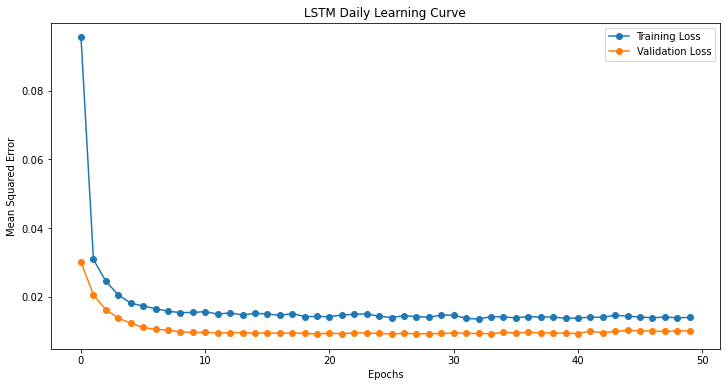

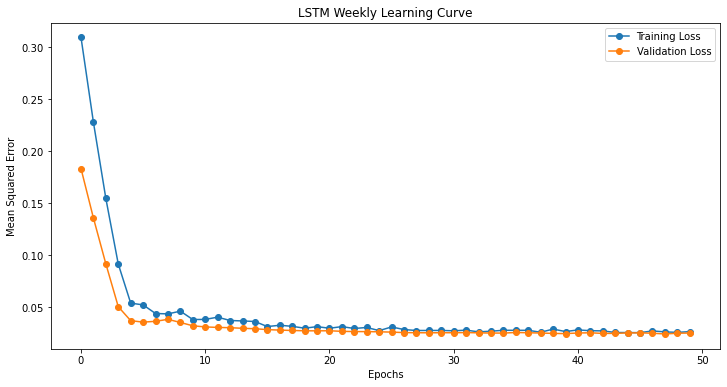

In [28]:
freq_daily = 'D'
freq_weekly = 'W'

arima_data_daily = prepare_arima_data(data, freq_daily)
arima_data_weekly = prepare_arima_data(data, freq_weekly)

# Prepare data for LSTM for daily
data_normalized_daily = scaler_lstm.fit_transform(arima_data_daily.values.reshape(-1, 1))
x_lstm_daily, y_lstm_daily = prepare_lstm_data(data_normalized_daily, time_steps)
x_lstm_daily = np.reshape(x_lstm_daily, (x_lstm_daily.shape[0], x_lstm_daily.shape[1], 1))

# Create and train LSTM model for daily data
lstm_model_daily = Sequential()
lstm_model_daily.add(LSTM(units=50, activation='relu', input_shape=(time_steps, 1), dropout=0.5, recurrent_dropout=0.7,kernel_regularizer='l2'))
lstm_model_daily.add(Dense(units=1))
lstm_model_daily.compile(optimizer='adam', loss='mean_squared_error')

# Fit LSTM model and get the history for learning curves
history_daily = lstm_model_daily.fit(x_lstm_daily, y_lstm_daily, epochs=50, batch_size=32, validation_split=0.1)

# Predictions from LSTM model for daily data
lstm_predictions_normalized_daily = lstm_model_daily.predict(x_lstm_daily)
lstm_predictions_daily = scaler_lstm.inverse_transform(lstm_predictions_normalized_daily)

# Extract residuals for daily data
residuals_daily = arima_data_daily.values[time_steps:] - lstm_predictions_daily.flatten()

# Train ARIMA model on residuals for daily data
arima_model_residuals_daily = fit_auto_arima(residuals_daily)
order_residuals_daily = arima_model_residuals_daily.get_params()['order']

print(f'Auto ARIMA Order for Daily Residuals: {order_residuals_daily}')

# Continue with the same procedure for weekly data

# Prepare data for LSTM for weekly
data_normalized_weekly = scaler_lstm.fit_transform(arima_data_weekly.values.reshape(-1, 1))
x_lstm_weekly, y_lstm_weekly = prepare_lstm_data(data_normalized_weekly, time_steps)
x_lstm_weekly = np.reshape(x_lstm_weekly, (x_lstm_weekly.shape[0], x_lstm_weekly.shape[1], 1))

# Create and train LSTM model for weekly data
lstm_model_weekly = Sequential()
lstm_model_weekly.add(LSTM(units=50, activation='relu', input_shape=(time_steps, 1), dropout=0.5, recurrent_dropout=0.7,kernel_regularizer='l2'))
lstm_model_weekly.add(Dense(units=1))
lstm_model_weekly.compile(optimizer='adam', loss='mean_squared_error')

# Fit LSTM model and get the history for learning curves
history_weekly = lstm_model_weekly.fit(x_lstm_weekly, y_lstm_weekly, epochs=50, batch_size=32, validation_split=0.1)

# Predictions from LSTM model for weekly data
lstm_predictions_normalized_weekly = lstm_model_weekly.predict(x_lstm_weekly)
lstm_predictions_weekly = scaler_lstm.inverse_transform(lstm_predictions_normalized_weekly)

# Extract residuals for weekly data
residuals_weekly = arima_data_weekly.values[time_steps:] - lstm_predictions_weekly.flatten()

# Train ARIMA model on residuals for weekly data
arima_model_residuals_weekly = fit_auto_arima(residuals_weekly)
order_residuals_weekly = arima_model_residuals_weekly.get_params()['order']

print(f'Auto ARIMA Order for Weekly Residuals: {order_residuals_weekly}')

# Plot learning curves
def plot_learning_curve(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

# Plot learning curve for daily data
plot_learning_curve(history_daily, 'LSTM Daily Learning Curve')

# Plot learning curve for weekly data
plot_learning_curve(history_weekly, 'LSTM Weekly Learning Curve')


# **Feature Selection**

In [40]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

# Assuming you have a DataFrame 'data' with features and target_column
target_column = 'Global_active_power'

# Compute correlation matrix
correlation_matrix = data.corr()

# Select features with high correlation with the target variable
selected_features_corr = correlation_matrix[target_column][correlation_matrix[target_column].abs() > 0.2].index.tolist()

# Extract features and target variable
X = data[selected_features_corr].values
y = data[target_column].values

# Use mutual information for feature selection
mi_selector = SelectKBest(mutual_info_regression, k='all')
mi_selector.fit(X, y)

# Select features with high mutual information
selected_features_mi = np.array(selected_features_corr)[mi_selector.get_support()]

# Use RandomForest to get feature importance
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Select features with high importance
selected_features_rf = np.array(selected_features_corr)[np.argsort(rf_model.feature_importances_)[::-1][:5]]


# Print selected features
print("Selected Features (Correlation):", selected_features_corr)
print("Selected Features (Mutual Information):", selected_features_mi)
print("Selected Features (Random Forest):", selected_features_rf)


Selected Features (Correlation): ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
Selected Features (Mutual Information): ['Global_active_power' 'Global_reactive_power' 'Voltage'
 'Global_intensity' 'Sub_metering_1' 'Sub_metering_2' 'Sub_metering_3']
Selected Features (Random Forest): ['Global_active_power' 'Global_intensity' 'Voltage' 'Sub_metering_1'
 'Sub_metering_2']


In [49]:
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   
Sub_metering_1                    0.484401               0.123111 -0.195976   
Sub_metering_2                    0.434569               0.139231 -0.167405   
Sub_metering_3                    0.638555               0.089617 -0.268172   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998889        0.484401        0.434569   
Global_reactive_power          0.266120        0.123111        0.139231   
Voltage                       -0.411363       -0.195976       -0.167405   
Global_intensity               1.000000        